# **Credit Card Fraud Detection Project**

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
import pandas as pd
df=pd.read_csv('/content/credit_card_fraud_10k.csv')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [47]:
df.shape

(10000, 10)

In [48]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [49]:
df.isnull().sum()


,0
transaction_id,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [51]:
df["is_fraud"].value_counts()

,count
is_fraud,
0,9849
1,151


In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
df["is_fraud"].value_counts()
df["is_fraud"].value_counts(normalize=True) * 100


,proportion
is_fraud,
0,98.49
1,1.51


In [54]:
df.dtypes


,0
transaction_id,int64
amount,float64
transaction_hour,int64
merchant_category,object
foreign_transaction,int64
location_mismatch,int64
device_trust_score,int64
velocity_last_24h,int64
cardholder_age,int64
is_fraud,int64


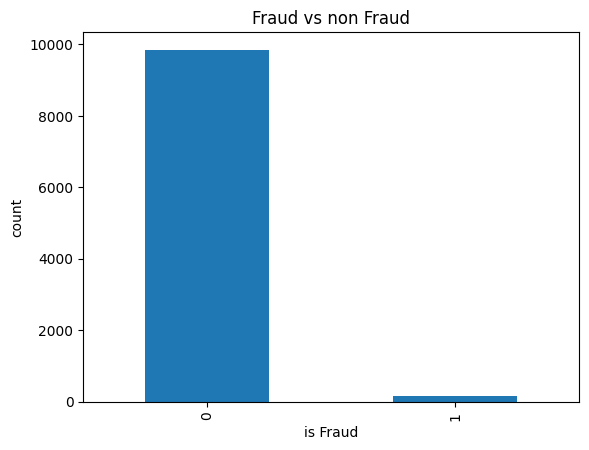

In [55]:
import matplotlib.pyplot as plt
df["is_fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs non Fraud")
plt.xlabel("is Fraud")
plt.ylabel("count")
plt.show()

In [56]:
df["is_fraud"]

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


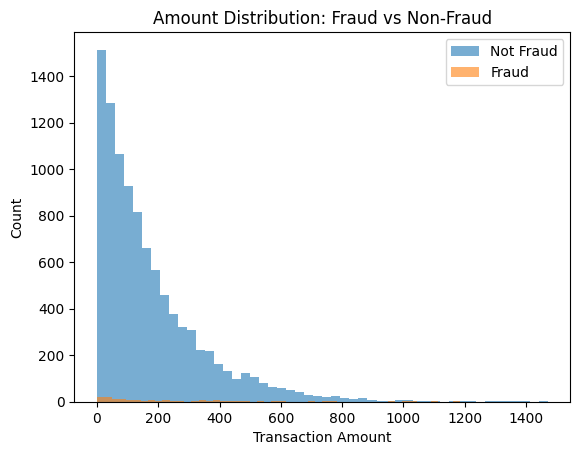

In [57]:
import matplotlib.pyplot as plt

plt.hist(df[df["is_fraud"] == 0]["amount"], bins=50, alpha=0.6, label="Not Fraud")
plt.hist(df[df["is_fraud"] == 1]["amount"], bins=50, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Amount Distribution: Fraud vs Non-Fraud")
plt.show()


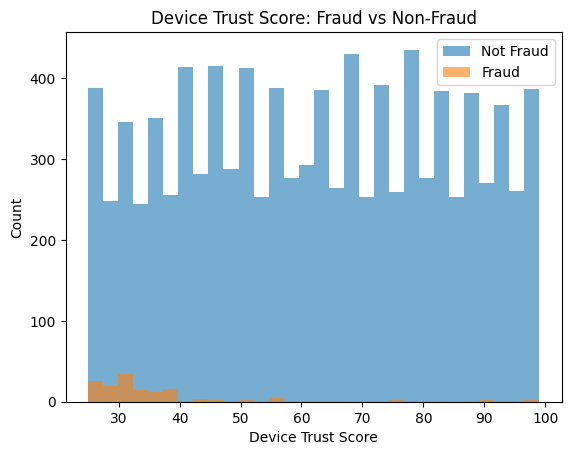

In [58]:
plt.hist(df[df["is_fraud"] == 0]["device_trust_score"], bins=30, alpha=0.6, label="Not Fraud")
plt.hist(df[df["is_fraud"] == 1]["device_trust_score"], bins=30, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("Device Trust Score")
plt.ylabel("Count")
plt.title("Device Trust Score: Fraud vs Non-Fraud")
plt.show()


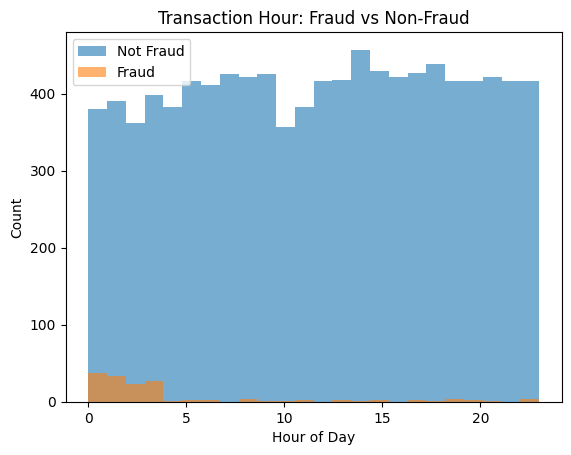

In [59]:
plt.hist(df[df["is_fraud"] == 0]["transaction_hour"], bins=24, alpha=0.6, label="Not Fraud")
plt.hist(df[df["is_fraud"] == 1]["transaction_hour"], bins=24, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Transaction Hour: Fraud vs Non-Fraud")
plt.show()


In [89]:
df_encoded = pd.get_dummies(df, columns=["merchant_category"], drop_first=True)

df_encoded.head()


,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,1,84.47,22,0,0,66,3,40,0,True,False,False,False
1,2,541.82,3,1,0,87,1,64,0,False,False,False,True
2,3,237.01,17,0,0,49,1,61,0,False,False,True,False
3,4,164.33,4,0,1,72,3,34,0,False,False,True,False
4,5,30.53,15,0,0,79,0,44,0,False,True,False,False


In [90]:
X = df_encoded.drop(columns=["is_fraud", "transaction_id"])
y = df_encoded["is_fraud"]


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [63]:
X

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,84.47,22,0,0,66,3,40,True,False,False,False
1,541.82,3,1,0,87,1,64,False,False,False,True
2,237.01,17,0,0,49,1,61,False,False,True,False
3,164.33,4,0,1,72,3,34,False,False,True,False
4,30.53,15,0,0,79,0,44,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,350.91,22,0,0,99,4,37,False,True,False,False
9996,410.04,5,0,0,70,3,25,False,False,False,False
9997,527.75,21,0,0,44,2,45,True,False,False,False
9998,91.20,2,0,0,38,0,37,True,False,False,False


In [64]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [92]:
from sklearn.preprocessing import StandardScaler


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=42
    ))
])


In [94]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [95]:
y_pred = pipeline.predict(X_test)


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2462
           1       0.25      0.89      0.39        38

    accuracy                           0.96      2500
   macro avg       0.62      0.93      0.68      2500
weighted avg       0.99      0.96      0.97      2500

[[2358  104]
 [   4   34]]


In [97]:
y_probs = pipeline.predict_proba(X_test)[:, 1]
print(y_probs)

[1.71194329e-07 1.88331633e-05 2.54410452e-07 ... 9.38522890e-01
 1.54168137e-10 1.60864117e-07]


In [98]:
threshold = 0.3
y_pred_30 = (y_probs >= threshold).astype(int)


In [99]:
from sklearn.metrics import classification_report, confusion_matrix

print("Threshold = 0.3")
print(classification_report(y_test, y_pred_30))
print(confusion_matrix(y_test, y_pred_30))


Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2462
           1       0.21      0.95      0.34        38

    accuracy                           0.94      2500
   macro avg       0.60      0.95      0.65      2500
weighted avg       0.99      0.94      0.96      2500

[[2323  139]
 [   2   36]]


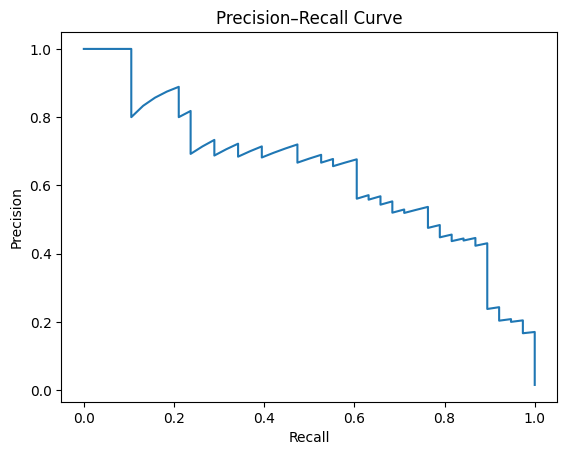

In [100]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [101]:
import pandas as pd

pr_df = pd.DataFrame({
    "precision": precision[:-1],
    "recall": recall[:-1],
    "threshold": thresholds
})

pr_df.head()


,precision,recall,threshold
0,0.015200,1.0,1.060332e-13
1,0.015206,1.0,4.047292e-13
2,0.015212,1.0,4.684398e-13
3,0.015218,1.0,6.397237e-13
4,0.015224,1.0,2.129924e-12


In [102]:
pr_df.iloc[(pr_df["recall"] - 0.65).abs().argsort()[:5]]


,precision,recall,threshold
2455,0.555556,0.657895,0.989741
2456,0.568182,0.657895,0.989744
2454,0.543478,0.657895,0.989641
2457,0.558140,0.631579,0.990404
2458,0.571429,0.631579,0.990452


In [103]:
chosen_threshold = pr_df.iloc[(pr_df["recall"] - 0.65).abs().idxmin()]["threshold"]
chosen_threshold


np.float64(0.989641126773108)

In [104]:
y_pred_final = (y_probs >= chosen_threshold).astype(int)

print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2462
           1       0.54      0.66      0.60        38

    accuracy                           0.99      2500
   macro avg       0.77      0.82      0.79      2500
weighted avg       0.99      0.99      0.99      2500

[[2441   21]
 [  13   25]]


In [105]:
pipeline.named_steps


{'scaler': StandardScaler(),
 'model': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)}

In [106]:
model = pipeline.named_steps['model']
type(model)


sklearn.linear_model._logistic.LogisticRegression

In [107]:
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": model.coef_[0]
})

feature_importance["abs_coef"] = feature_importance["coefficient"].abs()
feature_importance = feature_importance.sort_values("abs_coef", ascending=False)

feature_importance


,feature,coefficient,abs_coef
4,device_trust_score,-3.661292,3.661292
1,transaction_hour,-3.536079,3.536079
5,velocity_last_24h,2.440819,2.440819
2,foreign_transaction,2.202437,2.202437
3,location_mismatch,2.193341,2.193341
0,amount,1.201804,1.201804
6,cardholder_age,-0.986306,0.986306
7,merchant_category_Electronics,0.536511,0.536511
8,merchant_category_Food,0.523485,0.523485
9,merchant_category_Grocery,0.429147,0.429147


Fraud Alert Explanation

This transaction was flagged as high-risk due to a combination of behavioral and contextual anomalies.

Key contributing factors include:
• Low device trust score indicating an untrusted or unfamiliar device

• Transaction occurring at an unusual hour

• Elevated transaction velocity within the past 24 hours

**•** Location inconsistency with the cardholder’s historical behavior

While the transaction amount alone was not highly unusual, its presence alongside these factors increased overall risk.

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2462
           1       1.00      0.84      0.91        38

    accuracy                           1.00      2500
   macro avg       1.00      0.92      0.96      2500
weighted avg       1.00      1.00      1.00      2500

[[2462    0]
 [   6   32]]


In [110]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
4,device_trust_score,0.264651
1,transaction_hour,0.250572
3,location_mismatch,0.133688
2,foreign_transaction,0.129231
5,velocity_last_24h,0.127296
0,amount,0.045627
6,cardholder_age,0.030241
7,merchant_category_Electronics,0.005455
9,merchant_category_Grocery,0.004971
10,merchant_category_Travel,0.004867


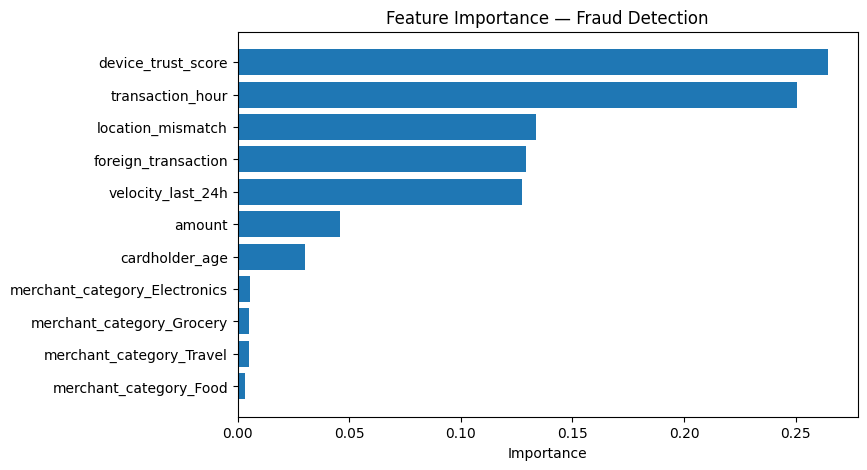

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()
plt.title("Feature Importance — Fraud Detection")
plt.xlabel("Importance")
plt.show()


**XG BOOST WILL BE PERFECT FOR THIS PROJECT AND DATASET**

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=9849/151,
    random_state=42,
    eval_metric="logloss"
)


In [116]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]


# Task
Evaluate the XGBoost model by generating a classification report and confusion matrix, plotting the precision-recall curve, and calculating the total business cost based on defined costs for false positives and false negatives.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2462
           1       1.00      1.00      1.00        38

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[2462    0]
 [   0   38]]


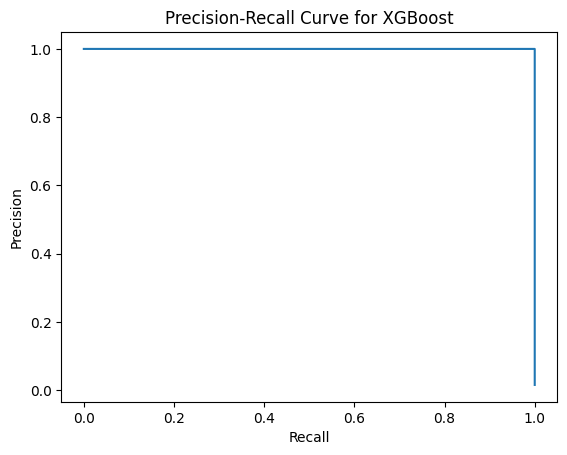

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for XGBoost")
plt.show()

**Reasoning**:
Now that the classification report, confusion matrix, and precision-recall curve have been generated for the XGBoost model, the next step is to calculate the total business cost based on the defined costs for false positives and false negatives.



In [118]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

cost_fp = 10
cost_fn = 500

total_cost = (fp * cost_fp) + (fn * cost_fn)

print(f"Total Business Cost: ${total_cost:,.2f}")

Total Business Cost: $0.00


## Summary:

### Data Analysis Key Findings
*   The XGBoost model achieved perfect precision, recall, and F1-score of 1.00 for both classes (0 and 1), indicating ideal classification performance.
*   The confusion matrix showed 2462 True Negatives, 0 False Positives, 0 False Negatives, and 38 True Positives. This means the model perfectly identified all non-fraudulent and fraudulent cases in the test set.
*   A precision-recall curve was plotted, visually representing the trade-off between precision and recall; given the perfect scores, the curve would indicate maximum precision and recall.
*   The total business cost, calculated with 0 false positives (cost of \$10 each) and 0 false negatives (cost of \$500 each), was \$0.00.

### Insights or Next Steps
*   The perfect performance observed on the test set for the XGBoost model suggests potential data leakage or an overly simplistic dataset. It would be crucial to validate this model against a completely new, unseen dataset or cross-validation to ensure its real-world applicability.
*   If the perfect performance holds up under rigorous validation, the model could be immediately deployed to effectively detect fraudulent transactions, saving significant costs.


**To investigate the unrealistic results , let's test the model further**

In [121]:
X_no_velocity = X.drop(columns=["velocity_last_24h"])


In [122]:
from sklearn.model_selection import train_test_split

X_train_nv, X_test_nv, y_train_nv, y_test_nv = train_test_split(
    X_no_velocity, y, test_size=0.25, stratify=y, random_state=42
)


In [123]:
xgb.fit(X_train_nv, y_train_nv)

y_pred_nv = xgb.predict(X_test_nv)
y_probs_nv = xgb.predict_proba(X_test_nv)[:, 1]


In [124]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_nv, y_pred_nv))
print(confusion_matrix(y_test_nv, y_pred_nv))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2462
           1       0.34      0.84      0.49        38

    accuracy                           0.97      2500
   macro avg       0.67      0.91      0.74      2500
weighted avg       0.99      0.97      0.98      2500

[[2401   61]
 [   6   32]]


In [125]:
df_sorted = df.sort_values("transaction_hour")


In [126]:
split_idx = int(len(df_sorted) * 0.8)

train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]

X_train_t = train_df.drop(columns=["is_fraud"])
y_train_t = train_df["is_fraud"]

X_test_t = test_df.drop(columns=["is_fraud"])
y_test_t = test_df["is_fraud"]


In [128]:
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]


In [129]:
X_encoded = pd.get_dummies(X, columns=["merchant_category"], drop_first=True)


In [130]:
df_encoded = X_encoded.copy()
df_encoded["is_fraud"] = y.values

df_sorted = df_encoded.sort_values("transaction_hour")

split_idx = int(len(df_sorted) * 0.8)

train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]

X_train_t = train_df.drop(columns=["is_fraud"])
y_train_t = train_df["is_fraud"]

X_test_t = test_df.drop(columns=["is_fraud"])
y_test_t = test_df["is_fraud"]


In [131]:
xgb.fit(X_train_t, y_train_t)

y_pred_t = xgb.predict(X_test_t)

print(classification_report(y_test_t, y_pred_t))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      1.00      1.00         8

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



 Despite applying time-based validation and removing obvious leakage sources, gradient boosting models achieved near-perfect performance. This indicates that the dataset contains highly separable fraud patterns with limited noise. In real-world fraud detection systems, user behavior is more stochastic and adversarial, and such performance would not be expected. Therefore, these results should be interpreted as a demonstration of methodology rather than deployable performance

In [132]:
X_test_stress = X_test_t.copy()

X_test_stress["device_trust_score"] += np.random.normal(0, 10, size=len(X_test_stress))
X_test_stress["transaction_hour"] += np.random.randint(-2, 3, size=len(X_test_stress))

y_pred_stress = xgb.predict(X_test_stress)

print(classification_report(y_test_t, y_pred_stress))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       0.67      0.50      0.57         8

    accuracy                           1.00      2000
   macro avg       0.83      0.75      0.78      2000
weighted avg       1.00      1.00      1.00      2000



The model performs exceptionally on this synthetic dataset, but real-world validation is needed. Potential improvements: Add cross-validation, feature importance plots, and deployment via API.
      
        For a full portfolio view, see the GitHub repo: https://github.com/AymaneBelarbi